In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = r"C:\Users\User\Desktop\Datasets\Pets\training_set"
DATADIR1 = r"C:\Users\User\Desktop\Datasets\Pets\test_set"
CATEGORIES = ["dogs", "cats"]

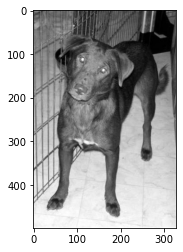

In [3]:
#Accessing directory files
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
img_array.shape

(499, 327)

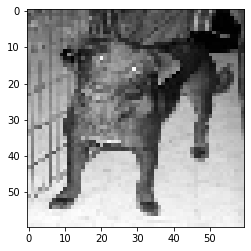

In [5]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            

create_training_data()

In [7]:
print(len(training_data))

10005


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
1
0
0
1
0
1


In [10]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
np.save('features.npy',X) 
np.save('label.npy',y) 

In [12]:
#Convolutional Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

X = np.load('features.npy')
y = np.load('label.npy')

In [13]:
X = X/255.0

In [14]:
model = Sequential()

#Input layer
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#First Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Output Layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer ="adam",
             metrics=["accuracy"])

model.fit(X,y, batch_size=32, epochs = 10, validation_split = 0.1)

Epoch 1/10
282/282 [==============================] - 89s 314ms/step - loss: 0.6734 - accuracy: 0.5683 - val_loss: 0.6366 - val_accuracy: 0.6264
Epoch 2/10
282/282 [==============================] - 98s 347ms/step - loss: 0.5870 - accuracy: 0.6909 - val_loss: 0.5647 - val_accuracy: 0.7083
Epoch 3/10
282/282 [==============================] - 95s 337ms/step - loss: 0.5365 - accuracy: 0.7350 - val_loss: 0.5466 - val_accuracy: 0.7313
Epoch 4/10
282/282 [==============================] - 103s 364ms/step - loss: 0.4921 - accuracy: 0.7609 - val_loss: 0.5460 - val_accuracy: 0.7233
Epoch 5/10
282/282 [==============================] - 84s 300ms/step - loss: 0.4642 - accuracy: 0.7802 - val_loss: 0.5517 - val_accuracy: 0.7273
Epoch 6/10
282/282 [==============================] - 79s 279ms/step - loss: 0.4447 - accuracy: 0.7955 - val_loss: 0.5356 - val_accuracy: 0.7493
Epoch 7/10
282/282 [==============================] - 89s 315ms/step - loss: 0.4143 - accuracy: 0.8068 - val_loss: 0.5579 - val_a

In [15]:
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR1, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_testing_data()

In [16]:
MODEL_NAME ="cats vs dogs"
if os.path.exists("{}.meta".format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [19]:
def dog_or_cat(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    pred = model.predict([new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)])
    if pred[0][0] == 1.0:
        return "IZ A CAT"
    else:
        return "IZ A DOG"

In [23]:
dog_or_cat(r"C:\Users\User\Desktop\cattttt.jpg")

'IZ A CAT'